In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Churn_MOdelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [4]:
## Extracting independent columns from third to thirteenth
X = df.iloc[:,3:13]

## Extracting dependent column Exited
y = df.iloc[:,13]

In [5]:
# Create dummies varible 
geography = pd.get_dummies(X['Geography'],drop_first=True)

gender = pd.get_dummies(X['Gender'],drop_first=True)

In [6]:
##Now concat the columns in one dataset
X = pd.concat([X,geography,gender],axis=1)

In [7]:
## AFter concat we have to remove these columns
X = X.drop(['Geography','Gender'],axis=1)

In [8]:
## NO splitting my data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [9]:
print(X_train.shape)
print(X_test.shape)

(8000, 11)
(2000, 11)


### Now some preprocessing
### Feature scaling

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Let's Create ANN

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense
#from keras.layers import LeakyRelu,PRelu,ELU
from keras.layers import Dropout

In [12]:
## Initialising the ANN
classifier = Sequential()

## Adding the input layer and the first hidden layer

In [37]:
# Weight initilization technique
# 1. he_normal
# 2. he_uniform

classifier.add(Dense(units=10, kernel_initializer = 'he_normal', activation='relu',input_dim=11))
classifier.add(Dropout(0.3))

# Adding the second hidden layer
classifier.add(Dense(units=20, kernel_initializer = 'he_normal', activation='relu'))
classifier.add(Dropout(0.4))

# Adding the third hidden layer
classifier.add(Dense(units=20, kernel_initializer = 'he_normal', activation='relu'))
classifier.add(Dropout(0.2))

# Adding output layer
classifier.add(Dense(units=1, kernel_initializer = 'glorot_uniform', activation='sigmoid'))

# Complete the ANN
classifier.compile(optimizer='adam', loss = 'binary_crossentropy',metrics=['accuracy'])

In [38]:
# Fitting the ANN to the training set
model_history = classifier.fit(X_train,y_train, validation_split=0.33,batch_size = 10, epochs=100)

Epoch 1/100
536/536 [==============================] - 9s 6ms/step - loss: 0.5095 - accuracy: 0.7962 - val_loss: 0.5067 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 3s 6ms/step - loss: 0.5062 - accuracy: 0.7962 - val_loss: 0.5076 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 3s 6ms/step - loss: 0.5060 - accuracy: 0.7962 - val_loss: 0.5070 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 3s 5ms/step - loss: 0.5062 - accuracy: 0.7962 - val_loss: 0.5074 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 3s 6ms/step - loss: 0.5062 - accuracy: 0.7962 - val_loss: 0.5065 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 3s 6ms/step - loss: 0.5063 - accuracy: 0.7962 - val_loss: 0.5067 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 3s 5ms/step - loss: 0.5062 - accuracy: 0.7962 - val_loss: 0.5068 - val_accuracy: 0.7955

Epoch 58/100
536/536 [==============================] - 3s 6ms/step - loss: 0.5059 - accuracy: 0.7962 - val_loss: 0.5068 - val_accuracy: 0.7955
Epoch 59/100
536/536 [==============================] - 3s 5ms/step - loss: 0.5062 - accuracy: 0.7962 - val_loss: 0.5068 - val_accuracy: 0.7955
Epoch 60/100
536/536 [==============================] - 3s 5ms/step - loss: 0.5062 - accuracy: 0.7962 - val_loss: 0.5066 - val_accuracy: 0.7955
Epoch 61/100
536/536 [==============================] - 3s 5ms/step - loss: 0.5061 - accuracy: 0.7962 - val_loss: 0.5065 - val_accuracy: 0.7955
Epoch 62/100
536/536 [==============================] - 3s 5ms/step - loss: 0.5062 - accuracy: 0.7962 - val_loss: 0.5066 - val_accuracy: 0.7955
Epoch 63/100
536/536 [==============================] - 3s 5ms/step - loss: 0.5061 - accuracy: 0.7962 - val_loss: 0.5068 - val_accuracy: 0.7955
Epoch 64/100
536/536 [==============================] - 3s 5ms/step - loss: 0.5065 - accuracy: 0.7962 - val_loss: 0.5066 - val_accuracy:

In [39]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


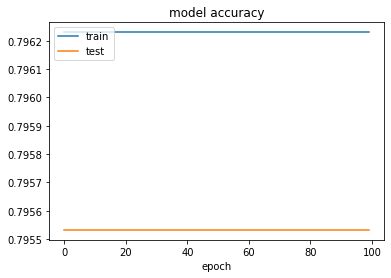

In [42]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [43]:
# Predicting the test set result
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)

63/63 [==============================] - 1s 3ms/step


In [44]:
# Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [46]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.7975